# Text Clustering Example

- This example shows text Clustering as an example of unsupervised machine learning task.
- The main steps are:
    - Explore dataset
    - Data Preparation
    - Feature Engineering
    - Model Training
    - Performance Assessment

- Clustering: grouping similar objects together based on their inherent attributes. 
- Being unsupervised appraoch there is no need of prelabelled datasets. 
- Examples: KMeans, PAM, DBSCAN, Spectral clustering, etc. 
- The choice of the algorithm mainly depends on the problem domain and the algorithm property. For example, to use KMeans we should have pre-knowledge of the number of clusters to obtain. However, if we do not know the number of clusters already, then DBSCAN is better.

#### Problem Definition
- As discussed above, the problem in context is unsupervised learning problem. 
- We will use BCC news datasets available from http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip. A total of 2225 documents with five different news categories(i.e. business, entertainment, politics, sport, and tech) are available in the dataset.

In [1]:
# Import necessary libraries 

import numpy as np
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


## 1. Load and explore data 
- The dataset contains 5 different categories in 5 different folders. 

In [2]:
from sklearn.datasets import load_files

# for reproducibility
random_state = 22

DATA_DIR = "./data/bbc/"
data = load_files(DATA_DIR, encoding="utf-8", decode_error="replace", random_state=random_state)
df = pd.DataFrame(list(zip(data['data'], data['target'])), columns=['text', 'label'])

#### It is necessary to do an exploratory data analysis in order to gain some insights from the data.

#### How is the data like?

In [3]:
df.head()

,text,label
0,Jones files Conte lawsuit\n\nMarion Jones has ...,3
1,English clubs make Euro history\n\nAll four of...,3
2,Tarantino 'to make Friday sequel'\n\nDirector ...,1
3,Lesotho textile workers lose jobs\n\nSix forei...,0
4,Celtic make late bid for Bellamy\n\nNewcastle ...,3


#### how many 'class label' present in the dataset??

In [4]:
df['label'].unique()

array([3, 1, 0, 4, 2])

#### Is the dataset balanced??

If the dataset is balanced then, the dataset contains an approximately equal portion of each class.

<AxesSubplot:>

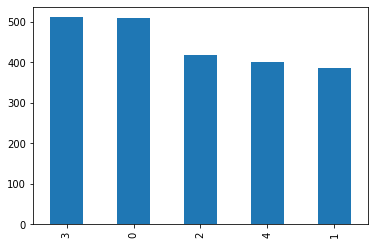

In [5]:
df['label'].value_counts().plot(kind='bar')

## 2. Feature Engineering
- we will use TFIDF approach.
- TfidfVectorizer will convert all the documents to a matrix of TF-IDF features.
- With Tfidfvectorizer we will calculate the word counts, IDF and TFIDF values in a go.



In [6]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tfidf_vectorizer.fit(df.text.values)
features = tfidf_vectorizer.transform(df.text.values)

#### Lets check some values from the first document

In [7]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=features[0]

# place tf-idf values in a pandas data frame
feature_df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
feature_df.sort_values(by=["tfidf"],ascending=False).head()

,tfidf
conte,0.673159
jones,0.292039
marion,0.213606
doping,0.181978
detector,0.154553


## 3. Model Building

- We will check a version of KMeans algorithm, i.e. Mini-batch KMeans (MB KMeans).
- MB KMeans is similar to the standard KMeans. But in the MB KMeans the computationlly expensive step is performed on a random sample only instead of the entire data.
- We will set the number of clusters = 5 because our dataset contains categories.
- But, if we do not have knowledge of the different labels then we may have to using domain knowledge and other ways to get the optimal numbers of clusters.

In [8]:
mkmeans = MiniBatchKMeans(n_clusters=5, random_state=random_state)
mkmeans.fit(features)

MiniBatchKMeans(n_clusters=5, random_state=22)

#### lets check the predictions useing labels_ attribute of the model.

In [9]:
mkmeans.predict(features)
print (mkmeans.labels_)
print ("\n")
print(mkmeans.cluster_centers_)

[4 2 4 ... 4 4 1]


[[1.34473036e-04 1.09906331e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.68041680e-04 1.05754629e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.47895846e-04 2.12690116e-03 0.00000000e+00 ... 0.00000000e+00
  4.60818743e-04 0.00000000e+00]
 [0.00000000e+00 5.00195763e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.67908112e-06 1.15377847e-02 4.45013653e-05 ... 4.09596975e-05
  0.00000000e+00 4.63992050e-04]]


#### Check KMeans

In [10]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=1)
kmeans.fit(features)
kmeans.predict(features)
print (mkmeans.labels_)
print ("\n")
print(mkmeans.cluster_centers_)

[4 2 4 ... 4 4 1]


[[1.34473036e-04 1.09906331e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.68041680e-04 1.05754629e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.47895846e-04 2.12690116e-03 0.00000000e+00 ... 0.00000000e+00
  4.60818743e-04 0.00000000e+00]
 [0.00000000e+00 5.00195763e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.67908112e-06 1.15377847e-02 4.45013653e-05 ... 4.09596975e-05
  0.00000000e+00 4.63992050e-04]]


In [11]:
# lets order the centroids

order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
order_centroids

array([[29039,  5711, 27997, ..., 18590, 18591,     0],
       [22845, 12210, 16592, ..., 16826, 16827,     0],
       [17704, 22845, 15294, ..., 15629, 15628, 14562],
       [11464,  9609, 22845, ..., 16998, 16999, 14562],
       [10650,  3844,  3182, ..., 13381, 13382, 14562]])

In [12]:
# lets check the features
terms = tfidf_vectorizer.get_feature_names()
terms[23361]

'seed'

In [13]:
# lets see the centroids into which clusters they belongs
for i in range(5):
    print("\nCluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print('%s' % terms[ind])


Cluster 0:
yukos
china
virus
oil
microsoft
russian
spyware
gazprom
security
windows

Cluster 1:
said
growth
market
year
economy
sales
bank
company
prices
economic

Cluster 2:
mr
said
labour
people
election
blair
government
party
brown
minister

Cluster 3:
game
england
said
win
cup
club
match
team
players
play

Cluster 4:
film
best
awards
award
music
band
year
said
films
album


#### lets do the prediction and check the results

## 4.Visualization
- Lets plot the features in a 2D space. 
- The dimension of features got from TfIdfVectorizer is large ( > 10,000)so  we will do the dimensionality reduction using Principal Component Analysis. 
- Here, PCA will transform the high dimensional features into 2 dimensions.

In [14]:
def plot_clusters(reduced_features, reduced_cluster_centers, cls):
    plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
    plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
    
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers_mk = pca.transform(mkmeans.cluster_centers_)
reduced_cluster_centers_k = pca.transform(kmeans.cluster_centers_)

#### lets visualize using scatter plot.
- In the plot:
    - X = first dimension 
    - Y = second dimension 
- Different colors represent the cluster members.

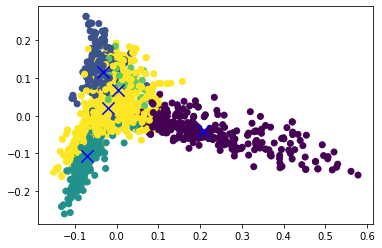

In [15]:
# MK Means
    
plot_clusters(reduced_features, reduced_cluster_centers_mk,mkmeans )

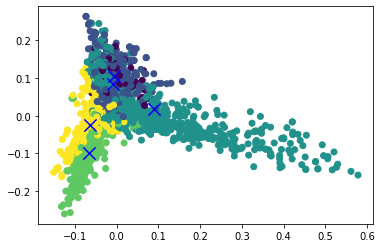

In [16]:
# K Means
    
plot_clusters(reduced_features, reduced_cluster_centers_k, kmeans)

## 5. Evaluation
- Let us check the predictions.

In [17]:
print("Prediction using KMeans")
X = tfidf_vectorizer.transform(["The new social network is popular in cell phones"])
predicted = kmeans.predict(X)
print(predicted)

Prediction using KMeans
[2]


- The prediction label is [2] i.e. cluster 2. It is related with technology and also the examined text is also technology related. This prediction is correct. 
- Further, we ahve to test the classifier with other text as well. 

In [18]:
print("Prediction using Mini Batch KMeans")
X = tfidf_vectorizer.transform(["The new social network is popular in cell phones"])
predicted = mkmeans.predict(X)
print(predicted)

Prediction using Mini Batch KMeans
[1]


##### Is the prediction accurate??

#### Other formal methods for evaluation:
- Since we have a labelled dataset is easier than the dataset without labelled dataset.
- homogeneity_score: values ranges from 0 and 1 where 1 indicates ideally homogeneous labeling.

In [19]:
from sklearn.metrics import homogeneity_score
hs_mk = homogeneity_score(df.label, mkmeans.predict(features))
hs_k = homogeneity_score(df.label, kmeans.predict(features))

print("Homogenity Mini KMeans: %f"%hs_mk)
print("Homogenity KMeans: %f"%hs_k)

Homogenity Mini KMeans: 0.573055
Homogenity KMeans: 0.619430


- In absence of labelled dataset, Cluster evaluation can be done using other metrics like Silhouette Coefficient (SC). 
- SC uses mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.  
- Here, b is the distance between a sample and the nearest cluster that the sample is not a part of.
- The SC for a sample is (b - a) / max(a,b).
    - best value = 1 
    - worst value = -1
    - near 0 values means overlapping clusters. 
    - Negative values means bad clustering.

In [20]:
from sklearn.metrics import silhouette_score
ss_mk = silhouette_score(features, labels=mkmeans.predict(features))
ss_k = silhouette_score(features, labels=kmeans.predict(features))

print("silhouette Mini KMeans: %f"%ss_mk)
print("silhouette KMeans: %f"%ss_k)

silhouette Mini KMeans: 0.009695
silhouette KMeans: 0.009264


## References:
-  https://sanjayasubedi.com.np/nlp/nlp-with-python-document-clustering/
- https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans
- http://kavita-ganesan.com/extracting-keywords-from-text-tfidf/
- https://towardsdatascience.com/applying-machine-learning-to-classify-an-unsupervised-text-document-e7bb6265f52